##                                      Devoir machine learning Avancé. 
###                                                             Sujet 1 : Textmining 
###                                           Réalisé par Mr Sayouti Souleymane Nouréini 


### a) Collecte des données sur twitter 

In [59]:
#### Importations des packages nécessaires
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [60]:
#### Importation des données depuis twitter, on va analyser le sentiments des personnes sur l'économie mondiale. 
access_token = "941617672407650304-1Y3S91usJPw0RMfn76YrPBFsn3c05UX"
access_token_secret = "SiCETSIZf1W5L1SrU6gA9Bs4FtAXYQ14RZAdlON0CDNkl"

consumer_key = "ZYazcxJX350zLJImL6NZJApFm"
consumer_secret = "CFgkXmEE1wPL4IY78sWI1vzWeuLqqpSzI3hxeW3aYiAViDTG58"

#  Connection 
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
def get_tweets(expression):
    all_tweets = []
        
    for i in range(130):
        if i!=0:   
            tweets = api.search(q=[expression],result_type="recent",lang="en",count=100, max_id = tweets.max_id)
            all_tweets.append(tweets)
            
        else:
            tweets = api.search(q=[expression],result_type="recent",lang="en",count=100)
            all_tweets.append(tweets)

        print("Step:", len(all_tweets))
    
    all_tweets = [tweet for tweets in all_tweets for tweet in tweets]
    return all_tweets, tweets.max_id

In [ ]:
#### Récupération des données, "World economy"
all_tweets, max_id = get_tweets(expression="World economy")

In [5]:
data_tweets = [tweet.text for tweet in all_tweets]
len(set(data_tweets))

4983

### Sauvegarde des données sous format CSV

In [83]:
### Creating a data frame 
from pprint import pprint
import pandas as pd
df_we = pd.DataFrame(list(set(data_tweets)), columns=["tweet"])
df_we.head()

,tweet
0,President Omar al-Bashir vowed Monday to launc...
1,@realDonaldTrump @WhiteHouse Funny the world s...
2,The circular economy is much more than waste m...
3,Women &amp; Girls: “Focus Canada” Canada’s Eco...
4,Retweeted Ellen MacArthur Fdn. (@circularecono...


In [8]:
## looking at the tweets download 
df_we.shape

(4983, 1)

In [84]:
#### Converting our data into CSv 
df_we.to_csv("tweets_we.csv", sep = ";", index = None, encoding="utf-8")

In [61]:
### Openning the data saved, we will use the data already downloaded
### You can use directly the data collected from tweeter 
import pandas as pd 
df_we = pd.read_csv("tweets_we.csv", sep=";", header=0)

In [62]:
df_we.head()

,tweet
0,President Omar al-Bashir vowed Monday to launc...
1,@realDonaldTrump @WhiteHouse Funny the world s...
2,The circular economy is much more than waste m...
3,Women &amp; Girls: “Focus Canada” Canada’s Eco...
4,Retweeted Ellen MacArthur Fdn. (@circularecono...


### b) Qualification des tweets

In [63]:
### importing regular expressions libraries and stopwords for preprocessing our data
import re
from nltk.corpus import stopwords

In [64]:
#lowering the tweets
df_we.tweet = df_we.tweet.apply(lambda tweet: tweet.lower())

In [65]:
df_we.head()

,tweet
0,president omar al-bashir vowed monday to launc...
1,@realdonaldtrump @whitehouse funny the world s...
2,the circular economy is much more than waste m...
3,women &amp; girls: “focus canada” canada’s eco...
4,retweeted ellen macarthur fdn. (@circularecono...


In [66]:
## Calling other libraires for processing our data 
import nltk
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

In [67]:
#Word tokenizing
df_we["tweet_list"] = df_we.tweet.apply(lambda tweet: word_tokenize(tweet, language="english"))


In [68]:
df_we.head()

,tweet,tweet_list
0,president omar al-bashir vowed monday to launc...,"[president, omar, al-bashir, vowed, monday, to..."
1,@realdonaldtrump @whitehouse funny the world s...,"[@, realdonaldtrump, @, whitehouse, funny, the..."
2,the circular economy is much more than waste m...,"[the, circular, economy, is, much, more, than,..."
3,women &amp; girls: “focus canada” canada’s eco...,"[women, &, amp, ;, girls, :, “, focus, canada,..."
4,retweeted ellen macarthur fdn. (@circularecono...,"[retweeted, ellen, macarthur, fdn, ., (, @, ci..."


In [69]:
### Using stopwords 
stopword_set = set(stopwords.words("english"))
df_we.tweet_list = df_we.tweet_list.apply(lambda row: [item for item in row if item not in stopword_set])


In [70]:
df_we.head()

,tweet,tweet_list
0,president omar al-bashir vowed monday to launc...,"[president, omar, al-bashir, vowed, monday, la..."
1,@realdonaldtrump @whitehouse funny the world s...,"[@, realdonaldtrump, @, whitehouse, funny, wor..."
2,the circular economy is much more than waste m...,"[circular, economy, much, waste, management, r..."
3,women &amp; girls: “focus canada” canada’s eco...,"[women, &, amp, ;, girls, :, “, focus, canada,..."
4,retweeted ellen macarthur fdn. (@circularecono...,"[retweeted, ellen, macarthur, fdn, ., (, @, ci..."


In [71]:
### we have to use the string properties of our dataframe 
tweet_list = df_we["tweet_list"].astype(str)


In [ ]:
# keep only words
regex_pat = re.compile(r'[^a-zA-Z\s]', flags=re.IGNORECASE)
tweet_list = tweet_list.str.replace(regex_pat, '')

# join the cleaned words in a list
tweet_list.str.join("")

In [73]:
df_we["tweet_list"] = tweet_list  ## returning it to our dataframe 

In [74]:
df_we.head()

,tweet,tweet_list
0,president omar al-bashir vowed monday to launc...,president omar albashir vowed monday launch w...
1,@realdonaldtrump @whitehouse funny the world s...,realdonaldtrump whitehouse funny world saw c...
2,the circular economy is much more than waste m...,circular economy much waste management recycli...
3,women &amp; girls: “focus canada” canada’s eco...,women amp girls focus canada canada econ...
4,retweeted ellen macarthur fdn. (@circularecono...,retweeted ellen macarthur fdn circularecono...


##### using regex seems to have a good result, because we only keep words, however, some number maybe useful in this exercise as far as we are interested with world economy. 

## c) Détection des entités nommées: Named entity recongnition 

### Un premier essaie a été d'essayer le package de Standford, et textblob pour le traitement des textes en Français, mais il s'avère que le Standford soit trop lent, devant passé par Java pour faire le traitement, et Texblob_fr ne marche, un gros problème d'encoding que nous n'avons pas pu résoudre. Finalement, nous nous sommes décidés à travailler sur les textes en anglais

In [75]:
### Calling the libraries which will be useful for this task. 
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

In [76]:
stanford_classifier = 'C:\\Users\\sayouti\\Documents\\StandfordParser\\stanford-ner-2018-02-27\\classifiers\\english.all.3class.distsim.crf.ser.gz'

In [77]:
stanford_ner_path = 'C:\\Users\\sayouti\\Documents\\StandfordParser\\stanford-ner-2018-02-27\\stanford-ner.jar'

In [ ]:
st = StanfordNERTagger(stanford_classifier, stanford_ner_path, encoding='utf-8')

In [79]:
def my_st(text):
    tokenized_text = word_tokenize(text)
    return st.tag(tokenized_text)

In [80]:
import os
java_path = "C:\\Program Files (x86)\\Java\\jre1.8.0_161\\bin\\java.exe"
os.environ['JAVAHOME'] = java_path

In [ ]:
df_we['st'] = df_we['tweet_list'].apply(my_st)

### On s'est rendu compte que l'utilisation de Standford tagger est beaucoup trop lent, et on utilisera le pos tagg nltk pour la langue anglaise. Effet, un essaie avec le Français n'a pas été concluant en utilisant Standford postager qui est lent. Nous avons essayé aussi le Textblob_fr mais ce dernier renvoyait toujours un "UnicodeError" de type "Charpmap can't decode ....". Notre choix, les lignes précédentes ont pour but de seulement vous montrer les différentes tentatives qui ont été faites. 

In [81]:
## Tokenization 
df_we["tweet_token"] = df_we.tweet_list.apply(lambda tweet: word_tokenize(tweet, language="english"))

In [82]:
### POSTAGGING With NLTK
from nltk import pos_tag 
df_we["tag"] = df_we.tweet_token.apply(pos_tag)

In [83]:
df_we.head()

,tweet,tweet_list,tweet_token,tag
0,president omar al-bashir vowed monday to launc...,president omar albashir vowed monday launch w...,"[president, omar, albashir, vowed, monday, lau...","[(president, NN), (omar, MD), (albashir, VB), ..."
1,@realdonaldtrump @whitehouse funny the world s...,realdonaldtrump whitehouse funny world saw c...,"[realdonaldtrump, whitehouse, funny, world, sa...","[(realdonaldtrump, NN), (whitehouse, NN), (fun..."
2,the circular economy is much more than waste m...,circular economy much waste management recycli...,"[circular, economy, much, waste, management, r...","[(circular, JJ), (economy, NN), (much, JJ), (w..."
3,women &amp; girls: “focus canada” canada’s eco...,women amp girls focus canada canada econ...,"[women, amp, girls, focus, canada, canada, eco...","[(women, NNS), (amp, VBP), (girls, NNS), (focu..."
4,retweeted ellen macarthur fdn. (@circularecono...,retweeted ellen macarthur fdn circularecono...,"[retweeted, ellen, macarthur, fdn, circulareco...","[(retweeted, VBN), (ellen, JJ), (macarthur, NN..."


## d) Analyse des sentiments 

In [84]:
## Importing the necessary functions
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [85]:
SIA = SentimentIntensityAnalyzer()

In [86]:
df_we['polarity_score']=df_we.tweet_list.apply(lambda x:SIA.polarity_scores(x)['compound'])
df_we['neutral_score']=df_we.tweet_list.apply(lambda x:SIA.polarity_scores(x)['neu'])
df_we['negative_score']=df_we.tweet_list.apply(lambda x:SIA.polarity_scores(x)['neg'])
df_we['positive_score']=df_we.tweet_list.apply(lambda x:SIA.polarity_scores(x)['pos'])
df_we['sentiment']=''
df_we.loc[df_we.polarity_score>0,'sentiment']='POSITIVE'
df_we.loc[df_we.polarity_score==0,'sentiment']='NEUTRAL'
df_we.loc[df_we.polarity_score<0,'sentiment']='NEGATIVE'

In [87]:
df_we.head()

,tweet,tweet_list,tweet_token,tag,polarity_score,neutral_score,negative_score,positive_score,sentiment
0,president omar al-bashir vowed monday to launc...,president omar albashir vowed monday launch w...,"[president, omar, albashir, vowed, monday, lau...","[(president, NN), (omar, MD), (albashir, VB), ...",-0.3612,0.690,0.192,0.118,NEGATIVE
1,@realdonaldtrump @whitehouse funny the world s...,realdonaldtrump whitehouse funny world saw c...,"[realdonaldtrump, whitehouse, funny, world, sa...","[(realdonaldtrump, NN), (whitehouse, NN), (fun...",-0.9100,0.304,0.586,0.110,NEGATIVE
2,the circular economy is much more than waste m...,circular economy much waste management recycli...,"[circular, economy, much, waste, management, r...","[(circular, JJ), (economy, NN), (much, JJ), (w...",-0.4215,0.811,0.189,0.000,NEGATIVE
3,women &amp; girls: “focus canada” canada’s eco...,women amp girls focus canada canada econ...,"[women, amp, girls, focus, canada, canada, eco...","[(women, NNS), (amp, VBP), (girls, NNS), (focu...",0.3818,0.852,0.000,0.148,POSITIVE
4,retweeted ellen macarthur fdn. (@circularecono...,retweeted ellen macarthur fdn circularecono...,"[retweeted, ellen, macarthur, fdn, circulareco...","[(retweeted, VBN), (ellen, JJ), (macarthur, NN...",0.7184,0.625,0.000,0.375,POSITIVE


## e) Représentation graphique : Nuage entités nommés 

In [ ]:
print(df_we["tweet_list"])

In [89]:
#### we will seperate positive and negative tweets in order to easly visualise their contained word, by using worldcloud visualisatio 
df_we_pos = df_we[ df_we['sentiment'] == 'POSITIVE']
df_we_pos = df_we_pos['tweet_list']
df_we_neg = df_we[ df_we['sentiment'] == 'NEGATIVE']
df_we_neg = df_we_neg['tweet_list']


In [90]:
### it is important to remove some words like RT and http, create a function for drowing world cloud 
### but it is important to import some libraires, packages usefull for this task 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


Positive words for World Economy


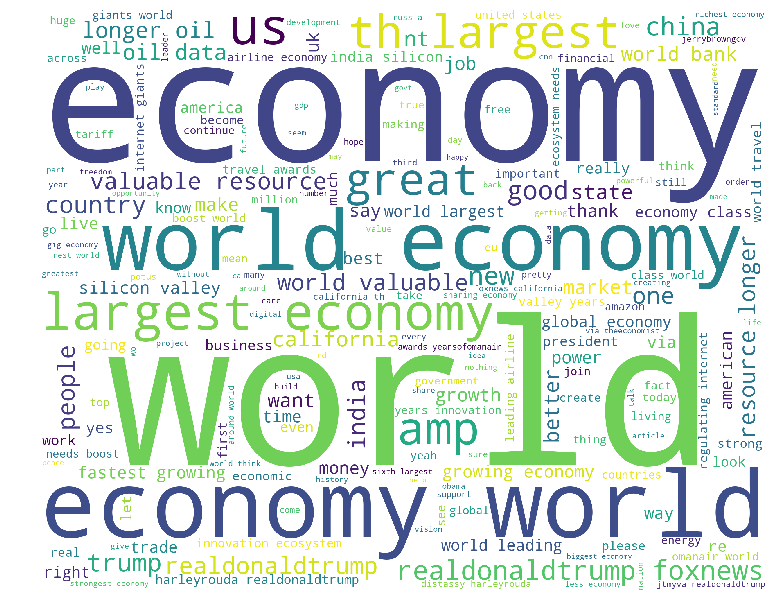

Negative words for World Economy


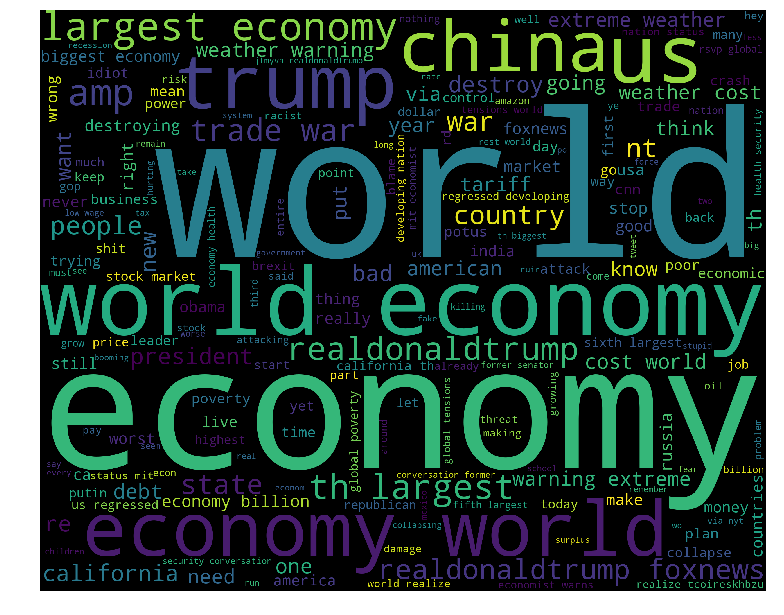

In [91]:
#### Function for wordcloud and drawing the wordcloud 
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('#')
                                and word != 'rt'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words for World Economy")
wordcloud_draw(df_we_pos,'white')
print("Negative words for World Economy")
wordcloud_draw(df_we_neg)

### Comme on peut le voir, les tweets positifs associés au mot "world economy" sont : china, ressource, oil, data, american, india. 
### Par contre pour les tweets négatifs on a : trump, war, poverty, obama, price, weather, 